# Equação de Poisson

A equação de Poisson a duas dimensões espaciais toma a forma:

$$\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2} = f$$

em que $u$ representa o campo cujos valores queremos determinar em todo o domínio, e em que $f$ representa um termo fonte (ausente na equação de Laplace). No caso electrostático, representa cargas eléctricas. No caso gravítico representa massas. Pode ainda ser vista como estado estacionário para que tende a equação de difusão ou de calor, que veremos no próximo capítulo.

Na sua forma discretizada, numa grelha rectangular de lados $\Delta x$ e $\Delta y$, a equação toma a forma:

$$\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2 u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}=f_{i,j}^{n}\qquad (1)$$

(o índice superior $n$ vai indicar a ordem de iteração quando chegarmos aos métodos iterativos, enquanto $i,j$ rotulam os pontos da grelha na direção $x,y$, respectivamente).  
Resolvendo a equação (1) em ordem a $u_{i,j}^{n}$, temos:

$$u_{i,j}^{n}=\frac{(u_{i+1,j}^{n}+u_{i-1,j}^{n})\Delta y^2+(u_{i,j+1}^{n}+u_{i,j-1}^{n})\Delta x^2-f_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

Temos também que considerar condições fronteira. Estas podem tomar várias formas. Condições de Dirichelet correspondem a fixar o valor de $u$ na fronteira. Condições de Neumann correspondem a fixar o valor da derivada normal para fora na fronteira (fisicamente, o fluxo). E condições mistas (Robin) correspondem a prescrever em todos os pontos da fronteira uma combinação linear (ou não-linear!) da forma:

$$\alpha_l u(x,y) + \beta_l \frac{\partial u(x,y)}{\partial x} = \gamma_l(y)$$

para o caso de uma fronteira com $x=\text{const}$, e temos expressões análogas para as fronteiras com $y=\text{const}$.

O nosso sistema de equações pode ser escrito na forma geral de um produto de uma matriz de coeficientes a multiplicar pelo vector de incógnitas, que deve ser igual ao termo fonte, de acordo com a equação (1). Teremos então:

$$ \begin{bmatrix} a_{11} & \cdots &  a_{1N}\\ \vdots & \ddots & \vdots \\ a_{N1} & \cdots &  a_{NN} \end{bmatrix} \times   \left[ \begin{array}{c} u_1  \\ \vdots \\u_N \end{array} \right] =\left[ \begin{array}{cc} b_1 \\ \vdots \\ b_N \end{array} \right] $$  
onde a matriz $\mathbf{A}$ dos coeficientes tem dimensões $N\times N$, (onde $N=n_x\times n_y$) é pentadiagonal e só tem elementos não nulos na diagonal principal, onde valem $-\frac{2}{\Delta x^2}- \frac{2}{\Delta y^2}$; na primeira sobrediagonal e na primeira subdiagonal, onde valem   $\frac{1}{\Delta x^2}$; e na $n_x$-ésima sobrediagonal e na $n_x$-ésima subdiagonal, onde valem $\frac{1}{\Delta y^2}.$ Por seu lado o vector dos termos independentes, $\mathbf{b}$, tem como componentes $f_m,\ m\in {1,\cdots,N}.$ (Isto é verdade para ordenamento por colunas primeiro; se fôr por linhas serão as  $n_y$-ésima sobre/sub-diagonais a ser não nulas).

## Métodos iterativos
Para problemas com poucos nodos da rede, podemos usar métodos directos para resolver o sistema de equações que nos dá $u_{i,j}^{n}$. Em 2D a matriz dos coeficientes (quando ordenamos os pontos seguindo ao longo de cada coluna em série, ou quando seguimos ao longo de cada linha em série!) é uma matriz pentadiagonal. No caso de 1D seria tridiagonal, para a qual temos o (eficiente) método de Thomas. No caso de 2D também há métodos mais eficientes que o método geral. Mas à medida que a dimensão do problema cresce, i.é, $N=n_x \times n_y$ é grande, temos que nos voltar para os métodos iterativos.  

Vamos considerar os vários métodos, e algumas variações. Temos assim os métodos de Jacobi, Gauss-Seidel e SOR (*successive-over-relaxations* ou sobre-relaxações sucessivas). 

Ao ordenar os nodos para que as variáveis $u_{i,j}^{n}$ sejam coordenadas de um vector, podemos escolher fazê-lo de várias maneiras (na realidade, qualquer permutação dos nodos é correcta, mas uma ordenação que não seja sistemática não é nada inteligente!). As mais usadas são *column-wise* ou *row-wise*, ié, percorrer cada coluna da primeira à última linha ($n_x$-ésima) , começando na primeira coluna e acabando na última ($n_y$-ésima), ou percorrendo primeiro linhas, para todas as linhas, por ordem. A escolha é indiferente do ponto de vista de escrever o algoritmo ou até o código, mas não o é do ponto de vista do desempenho do programa ao correr! Isso tem a ver com o modo como cada linguagem de programação guarda valores de um **array** na memória. Mas não nos vamos preocupar com esse problema neste momento.

### Método de Jacobi
Comecemos pelo método de Jacobi. Neste caso a actualização de $u_{i,j}^{n}$, ié, $u_{i,j}^{n+1}$, é feita exclusivamente à custa dos $u_{i,j}^{n}$, obtidos na iteração anterior:

$$u_{k}^{n+1} = \frac{1}{a_{kk}}\left[ b_k - \sum_{l=1}^{k-1} a_{kl}u_l^{n} - \sum_{l=k+1}^{N} a_{kl}u_l^{n}\right]. \qquad (2)$$
O algoritmo é iniciado com um vector qualquer.

### Método de Gauss-Seidel
O método de Gauss-Seidel tira partido de dois factos: i) pode-se provar que para certas matrizes (e a dos coeficientes da equação de Laplace/Poisson está nesse lote!) cada actualização de um nodo leva o sistema globalmente para mais perto da solução; e ii) se seguirmos uma ordem de actualização regular (como a ordenação que resulta de percorrer cada coluna de seguida) os nodos já actualizados na presente iteração têm valores "melhores" que os da iteração anterior. O algoritmo pode então ser partido em duas somas, ficando na forma:

$ \begin{align}
u_{k}^{n+1} =& \frac{1}{a_{kk}}\left[ b_k - \sum_{l=1}^{k-1} a_{kl}u_l^{n+1} - \sum_{l=k+1}^{N} a_{kl}u_l^{n}\right] \qquad (3)\\
=&u_{k}^{n} + \frac{1}{a_{kk}}\left[ b_k - \sum_{l=1}^{k-1} a_{kl}u_l^{n+1} - \sum_{l=k}^{N} a_{kl}u_l^{n}\right] \\
=&u_{k}^{n} + \delta_{k}^{n}.
\end{align}
$

### Método de SOR
O método SOR procura melhorar a método de Gauss-Seidel, aumentando o tamanho da correção por um factor $\omega$. O racional é que se em cada actualização estamos a aproximar-nos da solução, então "esticar" essa correção deve-nos levar mais depressa para a solução. Em geral, isso resulta. Mas nem sempre. Também podemos usar $\omega<1$ para "abrandar" problemas que tendem a não convergir, e nesse caso o método chama-se de *sub-relaxações successivas*.  
Note-se que se $\omega=1$ recuperamos o método de Gauss-Seidel, e se $\omega=0$ recuperamos o método de Jacobi.    
Cada problema tem um $\omega$ óptimo, mas que depende quer da equação, quer da geometria do domínio. Em geral é mais fácil obtê-lo por tentativas (frequentemente é à volta de $1.6$).

$ \begin{align}
u_{k}^{n+1}=& u_{k}^{n} + \omega \delta_{k}^{n}\\
=&u_{k}^{n} + \frac{\omega}{a_{kk}}\left[ b_k - \sum_{l=1}^{k-1} a_{kl}u_l^{n+1} - \sum_{l=k}^{N} a_{kl}u_l^{n}\right]   \qquad (4)\\
u_{k}^{n+1}=&(1-\omega)u_{k}^{n} + \frac{\omega}{a_{kk}}\left[ b_k - \sum_{l=1}^{k-1} a_{kl}u_l^{n+1} - \sum_{l=k+1}^{N} a_{kl}u_l^{n}\right]
\end{align}
$

## Implementação
Vamos testar e comparar os diferentes métodos. É sempre bom termos um resultado exacto com que comparar. Para tal podemos escolher um problema que seja possível resolver analiticamente. Essa solução pode ser usada para calcular o erro que cometemos com a solução numérica.  

Por outro lado, dada a esparsidade do nosso problema, é mais fácil codificar de acordo com uma das equações (2)-(4) do que usar o caso geral.

In [1]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import timeit

In [2]:
# Parâmetros
nx = 50
ny = 50
niter = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

print(dx)
# Inicialização
u  = np.zeros((ny, nx))    # note que estamos a pôr ny associado ao primeiro índice e nx ao segundo!
ud = np.zeros((ny, nx))
f  = np.zeros((ny, nx))
x  = np.linspace(xmin, xmax, nx)
y  = np.linspace(xmin, xmax, ny)

# Fonte
f[int(ny / 4), int(nx / 4)]  = 100          # corresponde a dois picos na diagonal
f[int(3 * ny / 4), int(3 * nx / 4)] = -100

# Condicões fronteira (Dirichlet)
u[0, :]    = 0   # u = 0 @ y=0
u[ny-1, :] = 0   # u = 0 @ y=Ly
u[:, 0]    = 0   # u = 0 @ x=0
u[:, nx-1] = 0   # u = 0 @ x=Lx

0.04081632653061224


In [4]:
def plot2D(x, y, p):
    fig = plt.pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [5]:
# método de Jacobi
for it in range(niter):             # número fixo de iterações
    ud = u.copy()
    for j in range(1,ny-1):      # só pontos internos
        for i in range(1,nx-1):
            u[j,i] = (( ud[j,i+1] + ud[j,i-1] )/dx**2 +
                     (ud[j+1,i] + ud[j-1,i])/dy**2 + f[j,i] ) / (2./dx**2 + 2./dy**2)
#print('Erro máximo em {:4d} iterações, foi  {:12.9f}'.format( niter, np.max(np.max(np.abs(u-ud))) )  )

In [6]:
def Poisson2D_Jacobi_lin(u,dx, dy,niter):     # usa for loops
    # método de Jacobi
    for it in range(niter):             # número fixo de iterações
        ud = u.copy()
        for j in range(1,ny-1):      # só pontos internos
            for i in range(1,nx-1):
                u[j,i] = (( ud[j,i+1] + ud[j,i-1] )/dx**2 +
                         (ud[j+1,i] + ud[j-1,i])/dy**2 + f[j,i] ) / (2./dx**2 + 2./dy**2)
    return u

330 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


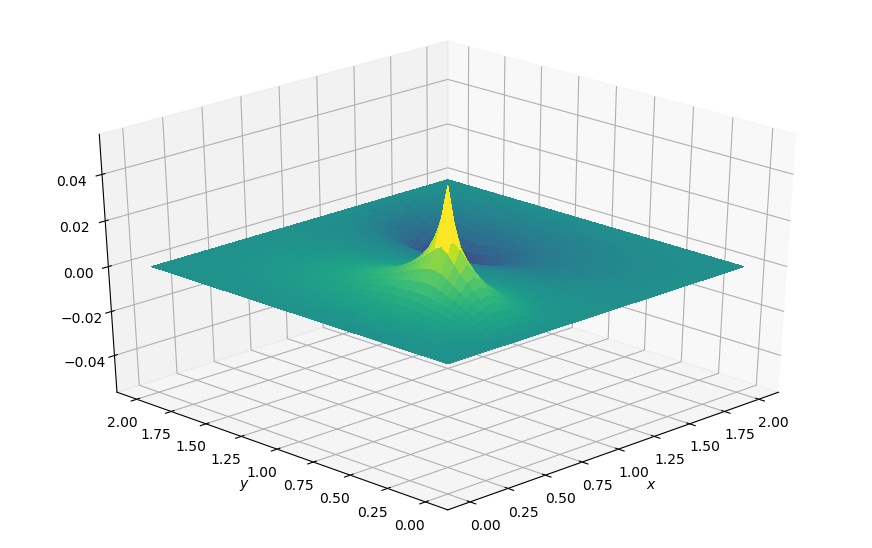

In [7]:
#u = Poisson2D_Jacobi_lin(u,dx, dy, nt)
#print(timeit.timeit(Poisson2D_Jacobi_lin(u,dx, dy, nt)))
%timeit Poisson2D_Jacobi_lin(u,dx, dy, niter)
plot2D(y,x,u)

In [8]:
# método de Jacobi vectorizado
def Poisson2D_Jacobi_vec(u,dx, dy,iter):
    for it in range(iter):            # número fixo de iterações

        ud = u.copy()

        u[1:-1,1:-1] = (((ud[1:-1, 2:] + ud[1:-1, :-2]) * dy**2 +   # vectorizado (melhor que loops "for" nos nodos)
                    (ud[2:, 1:-1] + ud[:-2, 1:-1]) * dx**2 -
                    f[1:-1, 1:-1] * dx**2 * dy**2) / 
                    (2 * (dx**2 + dy**2)))

    #print('Erro máximo em {:4d} iterações, foi  {:12.9f}'.format( niter, np.max(np.max(np.abs(u-ud))) )  )

2.58 ms ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


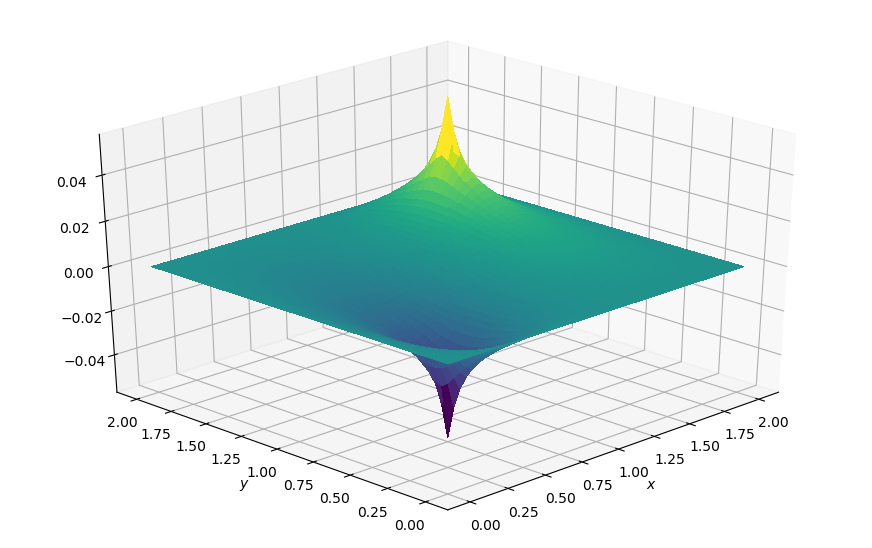

In [9]:
u  = np.zeros((ny, nx))
%timeit Poisson2D_Jacobi_vec(u,dx, dy, niter)
plot2D(y,x,u)

In [12]:
def poisson2d_Jacobi_vec(p, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)
    contador =1
    while l1norm > l1norm_target:   # número de iterações depende de ser atingida tolerância
        pn = p.copy()
        p[1:-1, 1:-1] = ( (dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                           dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1]) -f[1:-1, 1:-1] * dx**2 * dy**2) /
                        (2 * (dx**2 + dy**2)))
            
        p[:, 0]  = 0  # p = 0 @ x = 0  # não é verdadeiramentre necessário, pois só actualizamos os nodos internos
        p[:, -1] = 0  # p = 0 @ x = xmax
        p[0, :]  = 0  # p = 0 @ y = 0
        p[-1, :]  = 0 #  p = 0 @ y = ymax
        l1norm   = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                    np.sum(np.abs(pn[:])))
        contador = contador +1
    #print('num iteracoes = {:d}'.format(contador))
     
    return p

47.3 µs ± 341 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


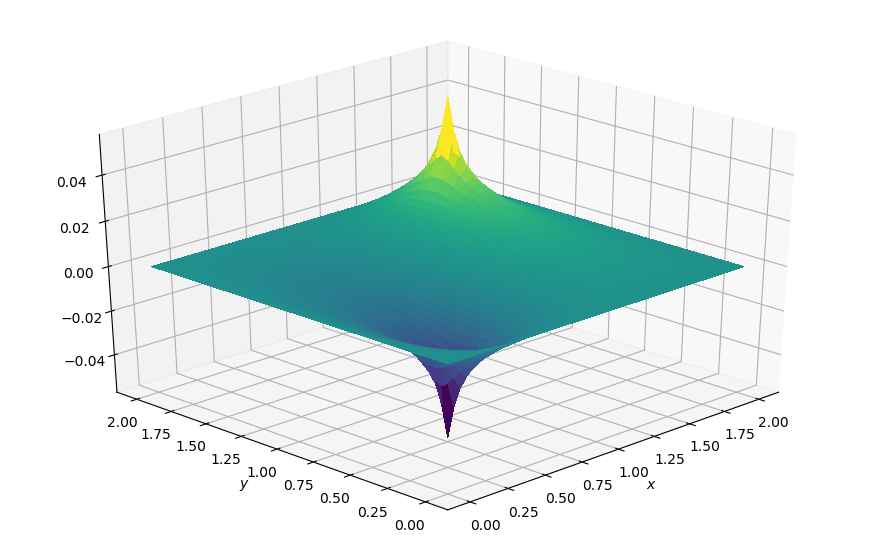

In [13]:
#u  = np.zeros((ny, nx)) # tem que ir para dentro da função!!
%timeit poisson2d_Jacobi_vec(u,dx, dy, 10e-5)
#u = Poisson2D_Jacobi_vec(u,dx, dy, niter)
plot2D(y,x,u)

In [ ]:
plot2D(x, y, u)

In [ ]:
def Poisson2D_GS_lin(u,dx, dy,nt):     # usa for loops
    # método de Jacobi
    for it in range(nt):             # número fixo de iterações
        for j in range(1,ny-1):      # só pontos internos
            for i in range(1,nx-1):
                u[j,i] = ( ( u[j,i+1] + u[j,i-1] )/dx**2 +
                           ( u[j+1,i] + u[j-1,i] )/dy**2 + f[j,i] ) / (2./dx**2 + 2./dy**2)
    return u

### Ordenação "Red-black"
![red-black ordering](red-black.png)  
Pontos abertos representam fronteira, ponto interiores são vermelhos ou pretos. Cada um tem apenas vizinhos da cor oposta!

In [ ]:
uint = u[1:-1,1:-1]
u_impar = uint[1:-2:2, 1:-2:2] e uint[2:-1:2, 2:-1:2] 
u_par   = uint[1:-2:2, 2:-1:2] e uint[2:-1:2, 1:-2:2]



O critério de paragem deve ser mais apurado que um número prescrito máximo de iteraçóes. Num problema podem ser de mais, noutro não serem suficientes. Podemos tomar uma medida numérica do erro como critério. 

 *absoluto $\text{max}(\delta U_{i,j})$

$\begin{itemize}
\item \text{absoluto} \text{max}(\delta U_{i,j})
\item
\item resíduo
\end{itemize}
$